## Calculation Constants

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Blood Volume, Hematocrit, MCV of a RBC
BV_ss = 4.3 + 1.4
Ht_ss = 0.42
Ht_ds = 0.336
MCV_ss = float(90e-15)

# Set Blood Loss by PPH and needed time to correct
BV_loss = 1 #L
base_line_time_weeks = 5 # weeks per pint
pint_to_liter = 1/0.473176473

time_to_correct_weeks = base_line_time_weeks * pint_to_liter * BV_loss
time_to_correct_days = round(time_to_correct_weeks * 7) # 73.968 is the float
print(time_to_correct_days)

convert_min_to_day = 60 * 24

# Molar constants and Conversion Factors
Fe_molar = 55.845
Tf_molar = 79_000

Hg_count = float(270e6) # Literature
Hg_molar = 65_000 # g/mol, Da, Literature (Journal of Biological Chemistry)
heme_molar = 616.487 # g/mol, Literature 

Avogadro_num = float(6.022e23) # molecules / mol

heme_count = Hg_count * 4 # molecules heme per RBC
convert_num_heme_to_RBC = 1/heme_count
convert_mol_heme_to_RBC = 1/(heme_count/Avogadro_num) # mol heme per RBC



74


## SS

In [4]:
n3 = 3.22e-5
n4 = 2.69e-5
n5 = 2.65e-6
n6 = n5

print(f'{n4*Fe_molar + n6*(Tf_molar+2*Fe_molar) - n3*Fe_molar - n5*Tf_molar:.15f}')
print(n4*Fe_molar*1000)
print(n6*(Tf_molar+2*Fe_molar)*1000)
print(n3*Fe_molar*1000)
print(n5*Tf_molar*1000)

print(1.5+209.6-209.3-1.8)

0.000000000000000
1.5022305
209.64597849999998
1.7982089999999997
209.35
-1.709743457922741e-14


In [5]:
heme_flow_rate = 3.6e-4
conversion_factor = 1/(heme_count/Avogadro_num) # mol heme per RBC

print(heme_flow_rate*conversion_factor/Avogadro_num)

heme_moles = heme_count/Avogadro_num # heme moles / RBC
g_RBC = heme_moles*heme_molar # g/RBC

print(200*10**9*g_RBC*1000)
print(175*10**9*g_RBC*1000)

excess_molar = heme_molar - Fe_molar # g/mol
excess_g_RBC = (heme_moles*(heme_molar-Fe_molar)) # g excess / RBC degraded
print(200*10**9*excess_g_RBC/excess_molar)
print(175*10**9*excess_g_RBC/excess_molar)


3.333333333333334e-13
221.1245300564596
193.48396379940218
0.0003586848223181667
0.00031384921952839584


### Blood Change: RBC

In [6]:
BV_ss = 4.3 + 1.4
Ht_ss = .42
plasma_volume_ss = BV_ss*(1-Ht_ss)
MCV = 90e-15
print(f'RBC total healthy:  {BV_ss*Ht_ss/MCV:,} ')

BV_temp = BV_ss-BV_loss # instant. blood loss
RBC_V_new = BV_temp*Ht_ss # new RBC volume
Ht_new = RBC_V_new/BV_ss # new hematocrit after filling with plasma


print(f'RBC total new:      {BV_ss*Ht_new/MCV:,}')
print(f'RBC diff:           {-BV_ss*Ht_new/MCV + BV_ss*Ht_ss/MCV:,}')
print(f'Ht new:             {Ht_new:.3f}')
print()
print(f'Plasma Vol old:     {BV_ss*(1-Ht_ss):.2f} L ')
print(f'Plasma Vol new:     {BV_ss*(1-Ht_new):.2f} L')
print(f'Plasma Vol change:  {-BV_ss*(1-Ht_ss) + BV_ss*(1-Ht_new):.2f} L')
print()
print(f'RBC Vol old:        {BV_ss*Ht_ss:.2f} L')
print(f'RBC Vol new:        {BV_ss*Ht_new:.2f} L')
print(f'RBC Vol change:     {BV_ss*Ht_new - BV_ss*Ht_ss:.2f} L')

plasma_V_old = BV_ss*(1-Ht_ss)
plasma_V_new = BV_ss*(1-Ht_new)

RBC total healthy:  26,599,999,999,999.996 
RBC total new:      21,933,333,333,333.33
RBC diff:           4,666,666,666,666.668
Ht new:             0.346

Plasma Vol old:     3.31 L 
Plasma Vol new:     3.73 L
Plasma Vol change:  0.42 L

RBC Vol old:        2.39 L
RBC Vol new:        1.97 L
RBC Vol change:     -0.42 L


## RBCs
$\dot{RBC} = \dot{Add} + \dot{Rem} $

In [7]:
#Specific Constants
plasma_final = 3.31
plasma_initial = 3.73


time_extra = 50
time_prior = -25
step_size = 1000*5
fractional_step_size = int((step_size / time_to_correct_days)*(time_extra))
time_extra = 50

t_ss_glimpse = np.linspace(time_prior, 0, int((step_size / time_to_correct_days)*(-time_prior)))
t_before = np.linspace(0, time_to_correct_days, step_size)
t_after = np.linspace(time_to_correct_days, (time_to_correct_days+time_extra), fractional_step_size)
t = np.concatenate((t_ss_glimpse, t_before, t_after), axis=0)

### Deg Kinetics


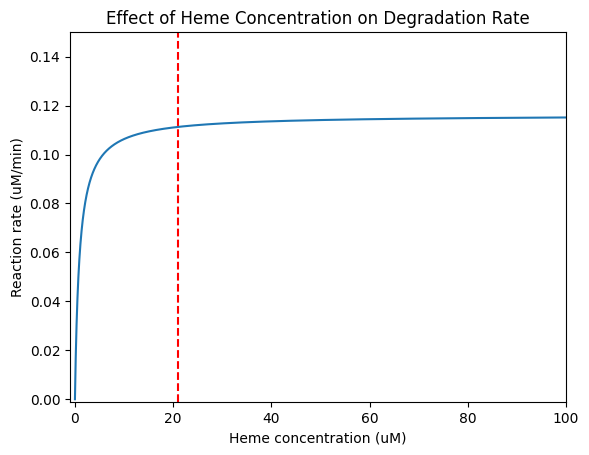

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Degradation
Km = 0.93 #uM
kcat = 3.5 #1/min
HO1 = 0.0332 # uM

Hem0 = np.arange(0, 100, 0.01)

v = np.zeros_like(Hem0) # initialize v array with zeros
for i in range(len(Hem0)):
    v[i] = (kcat * Hem0[i] * HO1) / (Km + Hem0[i])

plt.plot(Hem0, v)
plt.xlabel('Heme concentration (uM)')
plt.ylabel('Reaction rate (uM/min)')
plt.title('Effect of Heme Concentration on Degradation Rate')
plt.ylim(-0.001, 0.15)
plt.xlim(-1,100)
plt.axvline(x=21, color='r', linestyle='--')
plt.show() 

### Plasma Volume Func

Text(0.5, 1.0, 'Plasma Volume Decreases Until Blood Replenished')

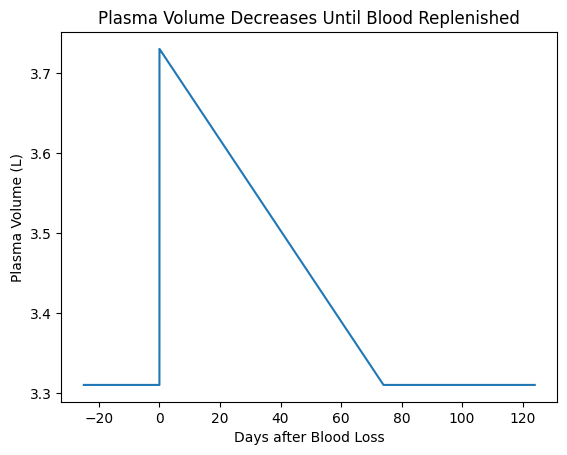

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plasma_volume(t):
    def ss_volume(t):
        return plasma_final
        
    def dynamic_volume(t):
        new_volume = plasma_initial - (plasma_initial - plasma_final)*t/(time_to_correct_days)
        return new_volume
    return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [ss_volume, dynamic_volume, ss_volume])

plasma_volume_arr = [plasma_volume(t) for t in t]
plt.plot(t, plasma_volume_arr)
plt.xlabel('Days after Blood Loss')
plt.ylabel('Plasma Volume (L)')
plt.title('Plasma Volume Decreases Until Blood Replenished')

### Degradation Rate 

$ \dot D(t) = \bold{0.10 ~\mu M/min} * \frac{V_{old, plasma}}{V_{new, plasma}(t)}*V_{old, plasma}*\frac{1}{4*270*10^6}*(10^{-6})*(6.022*10^{23})*60*24 ~ RBC/day$ 

In [10]:
import numpy as np

heme_ss = 21 # uM    
deg_rate = 0.10                       

volume_old = plasma_final
volume_dynamic_initial = plasma_initial 

# ignore
def degradation_rate(time):
    # heme is in uM
    Km = 0.93 #uM
    kcat = 3.5 #1/min
    HO1 = 0.0332 # uM
    heme = 21
    rate_uM_min = (kcat * heme * HO1) / (Km + heme) # uM/min
    
    return rate_uM_min * plasma_volume(time) * Avogadro_num / ( (4 * 270*10**6) * (10 ** 6) * 60 ) # RBC / sec

def p_volume(t):
    new_volume = volume_dynamic_initial - (volume_dynamic_initial - volume_old)*t/(time_to_correct_days)        
    return new_volume

def rate_D(time):
    def rate_D_before(time):
        fractional_volume = volume_old / p_volume(time)
        convert_min_to_day = 60 * 24
            
        val = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
        return val
    def rate_D_after(time):

        fractional_volume = 1
        convert_min_to_day = 60 * 24
            
        val = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
        return val
    return np.piecewise(t, [t < 0, (t >= 0)*(t <= time_to_correct_days), t > time_to_correct_days], [rate_D_after, rate_D_before, rate_D_after])

def D(time):
    def rate_D_integral_before(time):
        D0 = 0
        convert_min_to_day = 60 * 24
        a = (volume_dynamic_initial - volume_old)/(time_to_correct_days)
        fractional_volume = volume_old / p_volume(time)
        k = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day

        constant_D_before = D0 + (k * np.log(plasma_initial) / a)
        
        return (-k/a * np.log(np.abs(plasma_initial - a*time))) + constant_D_before
    def rate_D_integral_after(time):
        D0 = 0

        convert_min_to_day = 60 * 24
        fractional_volume = 1
        k = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day

        constant_D_after = D0
        
        return (k * time / volume_old) + constant_D_after
    return np.piecewise(t, [t < 0, (t >= 0)*(t <= time_to_correct_days), t > time_to_correct_days], [rate_D_integral_after, rate_D_integral_before, rate_D_integral_after])

In [24]:
#Deprecated
def p_volume(t):
    new_volume = volume_dynamic_initial - (volume_dynamic_initial - volume_old)*t/(time_to_correct_days)        
    return new_volume

def rate_D_before(time):

    fractional_volume = volume_old / p_volume(time)
    convert_min_to_day = 60 * 24
        
    val = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    return val

def rate_D_after(time):

    fractional_volume = 1
    convert_min_to_day = 60 * 24
        
    val = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    return val

### Synthesis Rate

$$ \dot S(t) = {synth_{max}} - \frac{(synth_{max}) - (synth_{ss})}{1 + exp{(-r(t - t_{switch})})}$$

In [95]:

synth_rate_max = 0.14 * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
synth_rate = 265770933333.33337 # RBC/day

synth_rate_ss = synth_rate
print(synth_rate_max)
print(synth_rate_max - synth_rate)

def rate_S(t):
    t_switch = 33 # parameter to fit to data
    r = .29 # parameter to fit to data
    def rate_S_steadystate(t):
        return synth_rate_ss
    def rate_S_dynamic(t):
        return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
    return np.piecewise(t, [t < 0, (t >= 0)*(t <= time_to_correct_days), t > time_to_correct_days], [rate_S_steadystate, rate_S_dynamic, rate_S_steadystate])

def S(time):
    def S_steadystate(t):
        return synth_rate_ss * t
    def S_dynamic(t):
        S0 = 0
        constant_S = S0 + ((synth_rate_max-synth_rate_ss)*np.log(np.abs(1+np.exp(t_switch))))
        return (synth_rate_max * t) - (((synth_rate_max-synth_rate_ss)/r)*np.log(np.abs(1+np.exp(-r*(t+t_switch))))) - (synth_rate_max-synth_rate_ss)*t + ((synth_rate_max-synth_rate_ss)*t_switch) + constant_S
    
    return np.piecewise(t, [t < 0, (t >= 0)*(t <= time_to_correct_days), t > time_to_correct_days], [S_steadystate, S_dynamic, S_steadystate])

# print(f'{synth_rate*time_to_correct_days:,}')
# print(f'{rate_D_before(0):,.0f}')

372079306666.6667
106308373333.33331


In [96]:
def rate_S_ss(t):
    return synth_rate_ss
def rate_S_dyn(t):
    return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))

ending deg rate: 265770933333.33337
ending syn rate: 265770933333.33337
23,175,248,455,701.832
Total RBC added: 4.659530E+12


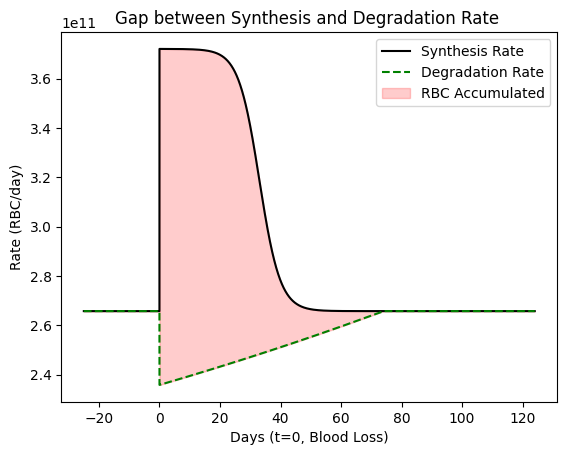

In [97]:
from scipy.integrate import quad

deg_rate_arr = rate_D(t)
synth_rate_arr = rate_S(t)

plt.plot(t, synth_rate_arr, label='Synthesis Rate', color='black')
plt.plot(t, deg_rate_arr, label='Degradation Rate', color='green', linestyle='--')

plt.xlabel('Days (t=0, Blood Loss)')
plt.ylabel('Rate (RBC/day)')
plt.title('Gap between Synthesis and Degradation Rate ')
plt.fill_between(t, deg_rate_arr, synth_rate_arr, where=synth_rate_arr >= deg_rate_arr, color='red', alpha=0.2, label='RBC Accumulated')
# plt.axvline(x=0, color='r', linestyle='--', label='Time of Blood Loss')
# plt.axhline(y=0, color='k', linestyle='--')
plt.legend()

print(f'ending deg rate: {deg_rate_arr[-1]}')
print(f'ending syn rate: {synth_rate_arr[-1]}')
assert synth_rate_arr[-1]-deg_rate_arr[-1] == 0

t_switch = 33 # parameter to fit to data
r = .29 # parameter to fit to data

def S_dyn(t):
    def rate_S_dyn(t):
        return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
    return quad(rate_S_dyn, 0, t)
def D_dyn(time):
    def rate_D_before(time):
        
        fractional_volume = volume_old / p_volume(time)
        convert_min_to_day = 60 * 24
            
        val = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
        return val
    return quad(rate_D_before, 0, time) 

print(f'{S_dyn(74)[0]:,}')

synth_focus_arr = S_dyn(time_to_correct_days)[0]
deg_focus_arr = D_dyn(time_to_correct_days)[0]

total_RBC_added = synth_focus_arr - deg_focus_arr

print(f'Total RBC added: {total_RBC_added:2E}')

## Find the parameters of Synth needed to reach RBC restoration by time_to_correct_days

In [75]:
# loop over the specified ranges with a precision of 2?
import math

arbitrary_step_size = 25000

t_switch_min, t_switch_max = 0, time_to_correct_days
t_ranges = np.linspace(t_switch_min, t_switch_max, arbitrary_step_size)

r_min, r_max = .1, .4 
r_ranges = np.linspace(r_min, r_max, arbitrary_step_size)


expected_val = 4666666666666.664
smallest_diff = float(50e12)
t_num_fit = -1
total_RBC_added = -1

def D_dyn(time):
    def rate_D_before(time):
        fractional_volume = volume_old / p_volume(time)
        convert_min_to_day = 60 * 24
            
        val = deg_rate * fractional_volume * volume_old * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
        return val
    return quad(rate_D_before, 0, time)[0]

D_rem = D_dyn(time_to_correct_days)
print(f'{D_rem:,}')

S_arr = []

# Let's test t_switch first which has the highest magnitude of change.
for t_num in t_ranges:
    t_switch= t_num # parameter to fit to data
    # print(t_switch)
    r = .29 # parameter to fit to data

    def S_dyn(t):
        t_switch = t_num
        def rate_S_dyn(t):
            t_switch = t_num
            return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
        return quad(rate_S_dyn, 0, t)[0]

    S_val = S_dyn(time_to_correct_days)
    S_arr.append(S_val)
    RBC_added = S_val - D_rem
    
    if abs(total_RBC_added - expected_val) < smallest_diff:
        print(smallest_diff)
        smallest_diff = abs(total_RBC_added - expected_val)
        t_num_fit = t_num
        
print(t_num_fit, smallest_diff)
print(f'{smallest_diff:,}')

 

18,515,718,779,648.36
50000000000000.0
0.0 4666666666667.664
4,666,666,666,667.664


In [93]:
# print(f'{min(diff_array):,}')
print(f'{max(S_arr):,}')
smallest_gap = float(50e12)
saved_idx = -1
saved_num = -1
for idx, num in enumerate(S_arr):
    if abs(num - 23182385446315.023) < 1e9 or abs(23182385446315.023 - num) < 1e9:
        print(idx, num)
# print(min(S_arr))
# print(max(S_arr))
# D_rem + expected_val
print(len(S_arr))

# between 11170 and 11171
print(t_ranges[11171])
print(t_ranges[11170])
        

27,279,774,385,764.277
11168 23181477901391.137
11169 23181792562985.887
11170 23182107224597.27
11171 23182421886225.266
11172 23182736547869.85
11173 23183051209531.023
11174 23183365871208.758
25000
33.06748269930797
33.06452258090324


In [98]:
expected_val = 4666666666666.664
smallest_dif = 5e12
r_num_fit = -1

r_min, r_max = .01, .4 
r_ranges = np.linspace(r_min, r_max, 2500)

for r_num in r_ranges:
    t_switch = 33 # parameter to fit to data
    r = r_num # parameter to fit to data
    def rate_S(t):
        def rate_S_steadystate(t):
            return synth_rate_ss
        def rate_S_dynamic(t):
            return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
        return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [rate_S_steadystate, rate_S_dynamic, rate_S_steadystate])


    rate_S_arr = rate_S(t)
    total_RBC_added = 0
    # //TODO: replace with an integral
    # for i, time in enumerate(t_before):
    #     if i == 0:
    #         continue
    #     total_RBC_added += (synth_rate_arr[i] - deg_rate_arr[i]) * (t[i]-t[i-1])
    
    if abs(expected_val - total_RBC_added) < smallest_dif:
        smallest_dif = abs(expected_val - total_RBC_added)
        r_num_fit = r
        
print(r_num_fit, smallest_dif)

0.01 4666666666666.664


### RBC Acc. Function

$ \dot{ACC} = \dot{S} - \dot{D} $

Target:
$\int_0^{t_f} \dot S(t)dt - \int_0^{t_f} \dot D(t)dt = N(t_f) = 4.67 * 10^{12} ~RBC$

(5000,)
(3378,)


Text(0.5, 0, 'Days after Blood Loss')

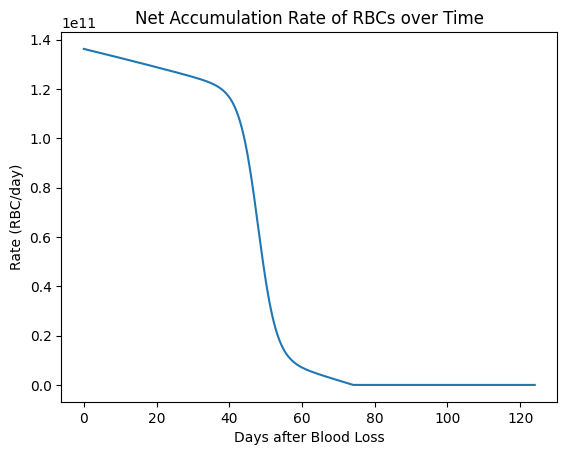

In [74]:
s_arr_before = rate_S_before(t_before)
s_arr_after = rate_S_after(t_after)
if isinstance(s_arr_after, (int, float)):
    s_arr_after = np.resize(s_arr_after, len(t_after))

d_arr_before = rate_D_before(t_before)
d_arr_after = rate_D_after(t_after)
if isinstance(d_arr_after, (int, float)):
    d_arr_after = np.resize(d_arr_after, len(t_after))
print(d_arr_before.shape)
print(d_arr_after.shape)


t_here = np.concatenate((t_before, t_after), axis=0)
d_arr = np.concatenate((d_arr_before, d_arr_after), axis=0)
s_arr = np.concatenate((s_arr_before, s_arr_after), axis=0)

diff = s_arr - d_arr
plt.plot(t_here, diff)
plt.title('Net Accumulation Rate of RBCs over Time')
plt.ylabel('Rate (RBC/day)')
plt.xlabel('Days after Blood Loss')
# plt.plot(t, s_arr, linestyle='--', color='r')
# plt.plot(t, d_arr, linestyle='--', color='g')

###  RBCs Function

In [99]:
# Correct Integration
# Accounts for non-linearity in Degradation
RBC_final = BV_ss*Ht_ss/MCV
RBC_initial = BV_ss*Ht_new/MCV
RBC_diff = -BV_ss*Ht_new/MCV + BV_ss*Ht_ss/MCV
print(RBC_final)


s_int = synth_rate*t

d_int_before = rate_D_integral_before(t_before)
d_int_after = rate_D_integral_after(t_after)
print(type(d_int_before)), type(d_int_after)
d_int = np.concatenate((d_int_before, d_int_after), axis=0)

diff = s_int - d_int

RBC_initial = BV_ss*Ht_new/MCV
y_arr = np.zeros(len(t))
y_arr[0] = RBC_initial

track_num = 0
for i, _ in enumerate(t_before):
    if i == 0:
        continue
    y_arr[i] = y_arr[i-1] + (s_int[i] - s_int[i-1] - d_int[i] + d_int[i-1])
    track_num = i
for i, _ in enumerate(t_after):
    y_arr[i+len(t_before)] = y_arr[track_num]

plt.plot(t, y_arr)
plt.ylabel('RBC Count (cells)')
plt.title('Total Red Blood Cell Count')
plt.xlabel('Days after Blood Loss')
plt.axhline(y=RBC_initial, color='r', linestyle='--')
plt.axhline(y=RBC_final, color='g', linestyle='--')

# plt.plot(t_before,lin_func(t_before), color='orange')
# plt.plot(t_after, np.resize([RBC_final], len(t_after)), color='orange')

print(f'{rate_D_integral_before(time_to_correct_day) - rate_S_integral(time_to_correct_days):,}')

26599999999999.996


NameError: name 'rate_D_integral_before' is not defined

In [ ]:
heme_flow_rate = 3.6*10**(-4)
conversion_factor = 1/(heme_count/Avogadro_num) # mol heme per RBC

print(heme_flow_rate*conversion_factor/Avogadro_num)

heme_moles = heme_count/Avogadro_num # heme moles / RBC
g_RBC = heme_moles*heme_molar # g/RBC

print(200*10**9*g_RBC*1000)
print(175*10**9*g_RBC*1000)

excess_molar = heme_molar - Fe_molar # g/mol
excess_g_RBC = (heme_moles*(heme_molar-Fe_molar)) # g excess / RBC degraded
print(200*10**9*excess_g_RBC/excess_molar)
print(175*10**9*excess_g_RBC/excess_molar)


3.333333333333334e-13
221.1245300564596
193.48396379940218
0.0003586848223181667
0.00031384921952839584
